In [1]:
import re
import pickle
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from wordcloud import WordCloud

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('../input/tweets-on-sushant-singh-rajput/SSR_tweets.csv')
data.head()

,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,New York,2010-06-24 20:09:30,62,92,149,False,2020-08-12 16:09:38,Why are Shiv Sena and NCP going so far to dive...,NaN,Twitter for iPhone,False
1,"Agra, India",2019-10-29 15:14:52,7,235,989,False,2020-08-12 13:37:26,@ARPITAARYA Hii Arpita ji today is black coat ...,['Sushant'],Twitter for Android,False
2,Bollywood,2008-12-24 08:22:42,4672827,400,1258,True,2020-08-12 10:56:03,"""There is so much noise on my tweet on #Sushan...",['Sushant'],Twitter Web App,False
3,NaN,2020-05-14 19:18:18,1,5,0,False,2020-08-12 10:43:01,https://t.co/ekXJPBOjVK\n\n🙏 Video must watch ...,['JusticeForSushant'],Twitter Web App,False
4,India,2012-11-19 14:48:20,2096,803,14,False,2020-08-12 08:05:08,Ankita Lokhande Shares 'Prayers and Positivity...,"['AnkitaLokhande', 'Sushant', 'Prayer']",Hocalwire Social Share,False


In [3]:
from nltk.stem import WordNetLemmatizer
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
     
        # Replace @USERNAME to ' '.
        tweet = re.sub(userPattern,' ', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [4]:
text = data['text']

In [5]:
import time
t = time.time()
corpus = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 3 seconds


In [6]:
df = pd.Series(corpus)
df.head()

0    why are shiv sena and ncp going so far to dive...
1    hii arpita ji today is black coat me soo very ...
2    there is so much noise on my tweet on sushant ...
3    http co ekxjpbojvk video must watch guy sushan...
4    ankita lokhande share prayer and positivity fo...
dtype: object

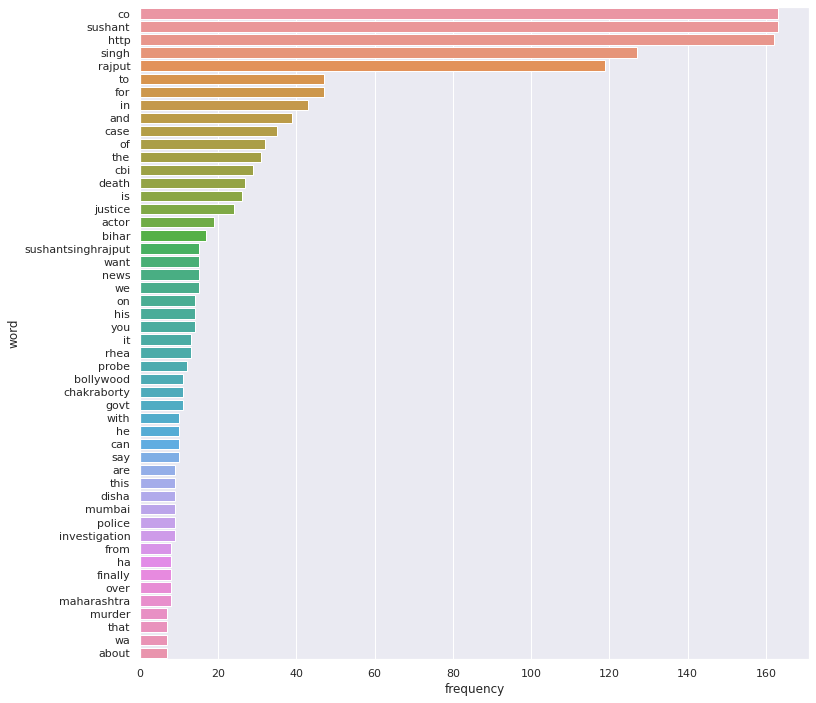

In [7]:
word_list = [word for line in df for word in line.split()]

sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

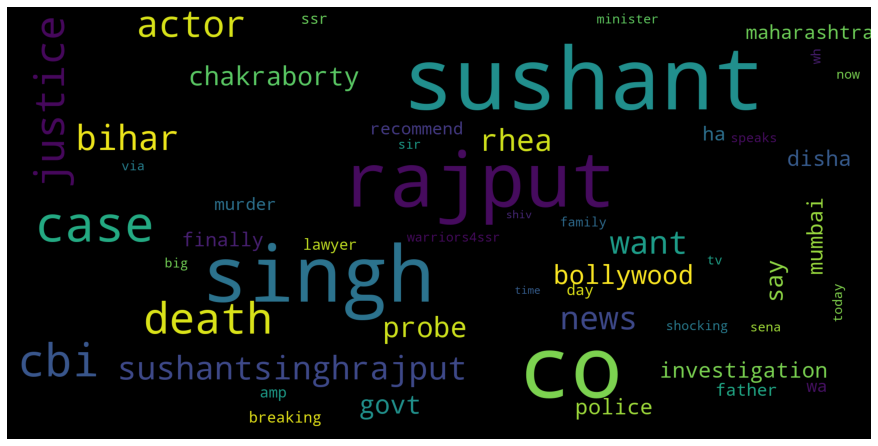

In [8]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)